In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score

In [3]:
def alexnet_model(input_shape, num_classes):
    model = keras.Sequential([
        # Capa convolucional 1
        layers.Conv2D(96, 11, strides=4, activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(3, strides=2),
        layers.BatchNormalization(),

        # Capa convolucional 2
        layers.Conv2D(256, 5, padding='same', activation='relu'),
        layers.MaxPooling2D(3, strides=2),
        layers.BatchNormalization(),

        # Capas convolucionales 3, 4 y 5
        layers.Conv2D(384, 3, padding='same', activation='relu'),
        layers.Conv2D(384, 3, padding='same', activation='relu'),
        layers.Conv2D(256, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(3, strides=2),
        layers.BatchNormalization(),

        # Capas completamente conectadas (Dense)
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.2),

        # Capa de salida
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [4]:
# Ejemplo de uso
input_shape = (100, 100, 1)  # Tamaño de entrada para AlexNet
num_classes = 12  # Número de clases
model = alexnet_model(input_shape, num_classes)

/home/arthur1/Documentos/GitHub/Prueba/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-11 12:52:14.179613: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [5]:
# Compilación del modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
training_set = sys.argv[0] = "/home/arthur1/Documentos/GitHub/Prueba/Datos/Salida/Datos_entrenamiento_TCGA_matriz.npy" ### "Input data npy file" 
x_sample = np.load ( training_set )
x_train = x_sample.reshape ((x_sample.shape[0], 100, 100,1)) # No. de muestras, Longitud, Ancho, No. de filtros

training_label = sys.argv[0] = "/home/arthur1/Documentos/GitHub/Prueba/Datos/Salida/Datos_entrenamiento_TCGA_etiquetas.npy" ### "Input label npy file" 
y_label = np.load ( training_label )
y_train = to_categorical(y_label, num_classes=12)

In [7]:
# Carga de datos de validacion
testing_set = sys.argv[0] = "/home/arthur1/Documentos/GitHub/Prueba/Datos/Salida/Datos_validacion_TCGA_matriz.npy"
test_sample = np.load ( testing_set )
x_test = test_sample.reshape ( (test_sample.shape[0], 100, 100, 1) ) # no. of samples, x pixels, y pixels, no. of files

# Carga de etiquetas de datos de validacion
testing_label = sys.argv[0] = "/home/arthur1/Documentos/GitHub/Prueba/Datos/Salida/Datos_validacion_TCGA_etiquetas.npy"
test_label = np.load ( testing_label )
test_label_compare = test_label
y_test = to_categorical (test_label,num_classes=12 )

In [8]:
# Entrenar el modelo
epocas=100
train_history = model.fit(x_train, y_train, epochs=epocas, validation_split=0.25)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 366ms/step - accuracy: 0.2431 - loss: 4.6943 - val_accuracy: 0.2801 - val_loss: 87.5781
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 344ms/step - accuracy: 0.6089 - loss: 1.0947 - val_accuracy: 0.0879 - val_loss: 51.1246
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 347ms/step - accuracy: 0.7269 - loss: 0.7511 - val_accuracy: 0.2150 - val_loss: 13.2319
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 344ms/step - accuracy: 0.8003 - loss: 0.5961 - val_accuracy: 0.0879 - val_loss: 20.2291
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 342ms/step - accuracy: 0.8438 - loss: 0.4160 - val_accuracy: 0.2117 - val_loss: 11.5812
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 341ms/step - accuracy: 0.8684 - loss: 0.4553 - val_accuracy: 0.3322 - val_loss: 7.5204
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 346ms/step - accuracy: 0.8965 - loss: 0.2838 - val_accuracy: 0.2704 - val_loss: 26.2071
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 341ms/step - accuracy: 0.8749 - loss: 0.4

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 23, 23, 96)     │        11,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 11, 11, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 5, 5, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 5, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 5, 5, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     4,198,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │        49,164 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,263,398 (283.29 MB)

 Trainable params: 24,754,060 (94.43 MB)

 Non-trainable params: 1,216 (4.75 KB)

 Optimizer params: 49,508,122 (188.86 MB)

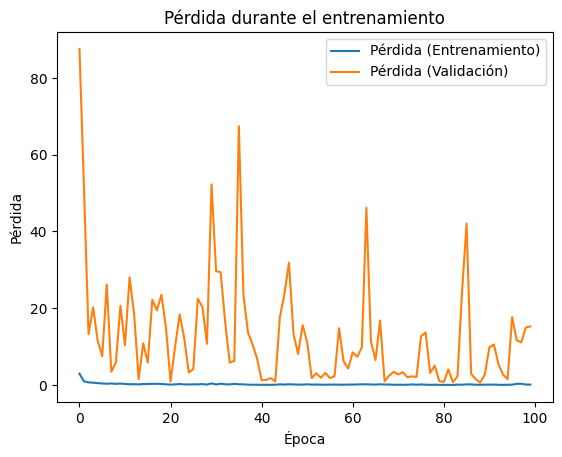

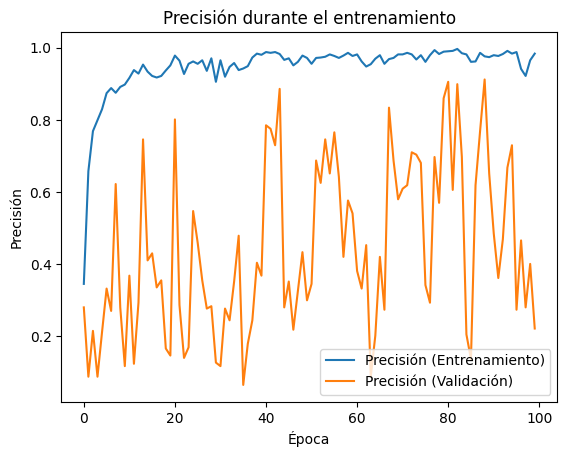

In [10]:
plt.plot(train_history.history['loss'], label='Pérdida (Entrenamiento)')
plt.plot(train_history.history['val_loss'], label='Pérdida (Validación)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.legend()
plt.show()

# Gráfico de la precisión

plt.plot(train_history.history['accuracy'], label='Precisión (Entrenamiento)')
plt.plot(train_history.history['val_accuracy'], label='Precisión (Validación)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()
plt.show()

In [11]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

#Calcular el MCC              MCC = (TP * TN - FP * FN) / sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
y_pred = model.predict(x_test) # o x_test
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
num_classes = cm.shape[0]
mcc_per_class = []
for i in range(num_classes):
    tp = cm[i, i]
    fp = np.sum(cm[:, i]) - tp
    fn = np.sum(cm[i, :]) - tp
    tn = np.sum(cm) - (tp + fp + fn)
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    if denominator == 0:
        mcc_per_class.append(0)
    else:
        mcc_per_class.append(numerator / denominator)
mcc = np.mean(mcc_per_class)
print("MCC:", mcc)

# Calculo de precision
# Calcular precisión micro
precision_micro = precision_score(y_true_classes, y_pred_classes, average='micro')
print("Precisión micro (Prueba):", precision_micro)

# Calcular precisión macro
precision_macro = precision_score(y_true_classes, y_pred_classes, average='macro')
print("Precisión macro (Prueba):", precision_macro)

# Calcular precisión ponderada
precision_weighted = precision_score(y_true_classes, y_pred_classes, average='weighted')
print("Precisión ponderada (Prueba):", precision_weighted)

# Calcular precisión por clase
precision_per_class = precision_score(y_true_classes, y_pred_classes, average=None)
print("Precisión por clase (Prueba):", precision_per_class)

154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.2131 - loss: 17.0492
Loss: 16.71261215209961
Accuracy: 0.21699266135692596
154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step
MCC: 0.1646095289411408
Precisión micro (Prueba): 0.2169926650366748
Precisión macro (Prueba): 0.42719848688082096
Precisión ponderada (Prueba): 0.47073822902331114
Precisión por clase (Prueba): [0.98245614 1.         0.11776115 0.         0.07964602 1.
 0.03571429 0.3929471  0.51785714 1.         0.         0.        ]


/home/arthur1/Documentos/GitHub/Prueba/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/arthur1/Documentos/GitHub/Prueba/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/arthur1/Documentos/GitHub/Prueba/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [12]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step


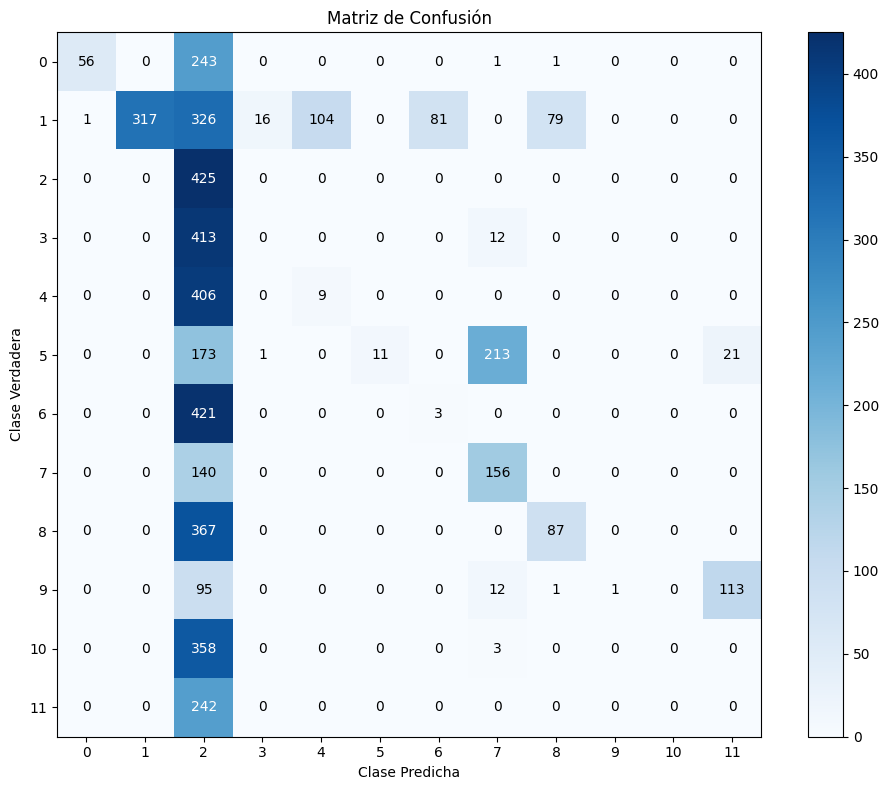

In [13]:

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(12)
plt.xticks(tick_marks, range(12))
plt.yticks(tick_marks, range(12))
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()